In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#dfs = pd.read_excel(file_name="Analyst Technical Test v1.2 (1).xlsx", sheet_name="TripValues")
df = pd.ExcelFile('Analyst Technical Test v1.2 (1).xlsx').parse('TripValues')

### Part 1 - Summary data documentation

In [3]:
#Field Names & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81911 entries, 0 to 81910
Data columns (total 5 columns):
ID                   81911 non-null int64
UserID               81911 non-null int64
DistanceTravelled    81881 non-null float64
OverallScore         81911 non-null float64
RegisteredOn         81911 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 3.1 MB


**info() displays a concise summary** of a DataFrame, here we can see there are total 81911 row entries in the data, while in **DistanceTravelled we have 81881 values** which indicates that there are some values missing in the column distance travelled. 

#### Field Names & Data Types

We observe that we have 5 fields in the dataset namely - ID, UserID, DistanceTravelled, OverallScore, and RegisteredOn

The datatypes for these fields are int64, int64, float64, float64, and datetime64 respectively.

#### Description of Fields
id - entry of each transaction into database

user id -id of unique user 

dist travelled - distance traveled by a particular user

overall score - overall score for the trip taken by a user 

registered on - date the trip was taken by the user and registered by the app


#### Primary Key in data
The field ID is the primary key in this TripValues table because it uniquely identifies each transaction recorded by the app


#### Data Summary Statistics

In [4]:
df.describe()

,ID,UserID,DistanceTravelled,OverallScore
count,81911.000000,81911.000000,81881.000000,81911.000000
mean,40956.000000,7512.695694,162.406150,0.505622
std,23645.813287,4326.868534,93.600229,0.288073
min,1.000000,1.000000,1.000000,0.010000
25%,20478.500000,3748.000000,81.000000,0.260000
50%,40956.000000,7554.000000,162.000000,0.510000
75%,61433.500000,11260.000000,244.000000,0.750000
max,81911.000000,14987.000000,324.000000,1.000000


- Here describe() method shows the statistical summary of the data, where again we can see in count DistanceTravelled has 81881 values.
- The range of overall score is 0.0-1.0, so the maximum score a user can have is 1.0.
- It show this data was collected from 14987 unique users. 
- Average score is 0.5

#### Data Assumptions
- Here we are assuming that the distance travelled is in Kms, since the app might have collected most of the data in Canada. In Canada distance is measured in Kms


In [5]:
len(df.UserID.unique())

14925

In [6]:
len(df.ID.unique())

81911

In [7]:
df.min()

ID                                     1
UserID                                 1
DistanceTravelled                      1
OverallScore                        0.01
RegisteredOn         2019-04-14 00:00:00
dtype: object

In [8]:
df.max()

ID                                 81911
UserID                             14987
DistanceTravelled                    324
OverallScore                           1
RegisteredOn         2020-02-01 00:00:00
dtype: object

- we observe that there are 81911 total number of transactions recorded by the app
- There are 14925 unique users
- There are 81,911 unique transactions and this is the total number of transactions recorded by the app. Therefore, we confirm that ID is primary key.
- Min values and Max values for all attributes of dataset can be observed from above
- There are 30 null values in the the Distance Travelled column

- RegisteredOn field gives us the insight as to when data was captured by the app. Also, the distance field suggests that gps of the mobile was used to keep track of distance by the app which was running in background on the mobile and it calculated the overall score of the trip. The id was automatically generated by the app, and userId is the unique id of the user so the app already had this information. The date and time were captured by the app automatically from the mobile device.

#### Further exploration Missing values
Average distance travelled is 162.4 kms, but that might not be showing right value, since around 30 values are missing from this column which might have affected the mean. We can investigate further whether these values are missing from a single user or multiple users. 

In [9]:
df.isnull().sum()

ID                    0
UserID                0
DistanceTravelled    30
OverallScore          0
RegisteredOn          0
dtype: int64

There are 30 values missing in 'DistanceTravelled'

In [10]:
df[df['DistanceTravelled'].isnull()]

,ID,UserID,DistanceTravelled,OverallScore,RegisteredOn
7679,78035,1424,NaN,0.38,2019-11-02
7680,22634,1424,NaN,0.94,2019-11-03
7681,15138,1425,NaN,0.08,2019-07-02
10813,23005,1979,NaN,0.12,2019-08-17
10814,57305,1979,NaN,0.82,2019-11-19
10815,52693,1979,NaN,0.81,2019-12-08
18913,13925,3464,NaN,0.13,2020-01-25
18914,46814,3464,NaN,0.28,2020-02-01
18915,46434,3465,NaN,0.50,2019-06-23
18916,65796,3465,NaN,0.10,2019-06-30


**Just looking at the data, we could see there are only few userIDs for whom the distance travelled values are missing. There could be various reasons for that. One of the reasons could be the app wasn't working properly on their phones or they might not have on their GPS so the app couldn't track the distance.**

**Explore how many unique users had this data missing**

In [11]:
len(df[df['DistanceTravelled'].isnull()].UserID.unique())

10

There are 10 unique users for whom distancetravelled information was missing on few days. **Lets explore further which user is missing this information on how many days.** Also every user is missing this information on different dates, so we can't say that this happened on particular date and there is some correlation between date and missing information. 

In [12]:
df[df['DistanceTravelled'].isnull()].groupby('UserID').count()


,ID,DistanceTravelled,OverallScore,RegisteredOn
UserID,,,,
1424,2,0,2,2
1425,1,0,1,1
1979,3,0,3,3
3464,2,0,2,2
3465,5,0,5,5
3466,4,0,4,4
3467,2,0,2,2
6154,3,0,3,3
6155,3,0,3,3


As we can see here mostly users are missing this information on 2-3 days only one user with userId 11567 is missing this on 5 days. So we can see did this user faced any technical information or reported glitch on these days or is it just coincidence that he/she might have not on her GPS on these days. 

In [13]:
df['DistanceTravelled'].value_counts(bins=5)

(65.6, 130.2]     16552
(259.4, 324.0]    16462
(0.676, 65.6]     16400
(194.8, 259.4]    16357
(130.2, 194.8]    16110
Name: DistanceTravelled, dtype: int64

Text(0, 0.5, 'Count')

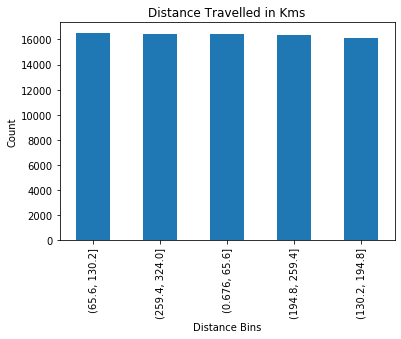

In [14]:
df['DistanceTravelled'].value_counts(bins=5).plot.bar()
plt.title('Distance Travelled in Kms')
plt.xlabel('Distance Bins')
plt.ylabel('Count')


In [15]:
df['OverallScore'].value_counts(bins=5)

(0.208, 0.406]      16524
(0.604, 0.802]      16441
(0.406, 0.604]      16425
(0.802, 1.0]        16333
(0.00801, 0.208]    16188
Name: OverallScore, dtype: int64

Text(0, 0.5, 'Count')

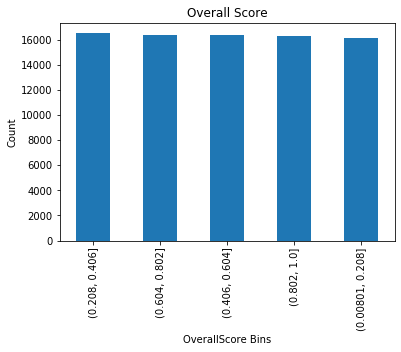

In [16]:
df['OverallScore'].value_counts(bins=5).plot.bar()
plt.title('Overall Score')
plt.xlabel('OverallScore Bins')
plt.ylabel('Count')

### Part-2 Relationships between UserID systems

In [17]:
df_userid_sys=pd.ExcelFile('Analyst Technical Test v1.2 (1).xlsx').parse('User Groups')

In [18]:
df_userid_sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
UserID_System1    14925 non-null float64
UserID_System2    15000 non-null int64
UserID_System3    14422 non-null float64
UserID_System4    2664 non-null float64
Unnamed: 4        0 non-null float64
Unnamed: 5        0 non-null float64
Unnamed: 6        1 non-null float64
dtypes: float64(6), int64(1)
memory usage: 820.4 KB


In [19]:
df_userid_sys=df_userid_sys[['UserID_System1','UserID_System2','UserID_System3','UserID_System4']]

In [20]:
df_userid_sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
UserID_System1    14925 non-null float64
UserID_System2    15000 non-null int64
UserID_System3    14422 non-null float64
UserID_System4    2664 non-null float64
dtypes: float64(3), int64(1)
memory usage: 468.8 KB


In [21]:
df_userid_sys.describe()

,UserID_System1,UserID_System2,UserID_System3,UserID_System4
count,14925.000000,15000.000000,14422.000000,2664.000000
mean,7491.153434,7500.500000,10488.770628,19576.500000
std,4328.146073,4330.271354,6779.571079,769.174883
min,1.000000,1.000000,1.000000,18245.000000
25%,3742.000000,3750.750000,5066.250000,18910.750000
50%,7491.000000,7500.500000,8671.500000,19576.500000
75%,11240.000000,11250.250000,17302.750000,20242.250000
max,14987.000000,15000.000000,20908.000000,20908.000000


![UserID_System](img/0.jpg)

![UserID_System](img/1.jpg)

### Business Questions

#### Dropping the missing values 
- For purposes of this excercise we are dropping the null values from the dataset. To handle null values we can either drop them or replace by mean/median/mode by checking the histogram but since we have ample amount of data and a very small number of missing values. We can safely drop them to avoid any undue impact

In [22]:
df.dropna(inplace=True) 

In [23]:
df.isnull().sum()

ID                   0
UserID               0
DistanceTravelled    0
OverallScore         0
RegisteredOn         0
dtype: int64

As we can see there are no missing values in the data

#### Do longer trips have lower scores?

Text(0.5, 1.0, 'Overall Score over Distance Travelled')

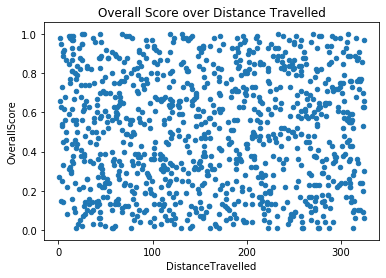

In [24]:
dfSample = df.sample(1000, random_state=1)
ax= dfSample.plot.scatter('DistanceTravelled', 'OverallScore')
ax.xaxis.set_ticks(np.arange(0, 400, 100))
plt.title("Overall Score over Distance Travelled")

Since we can't plot all 18000 points, we can take sample  of that data to see the distribution
As we can see here, we dont see any clear correction between Overall Score and Distance travelled. Lets confirm this with statistics by finding pearson correlation coefficient

In [25]:
df.corr()

,ID,UserID,DistanceTravelled,OverallScore
ID,1.000000,0.004226,-0.001550,-0.003167
UserID,0.004226,1.000000,0.000890,0.002107
DistanceTravelled,-0.001550,0.000890,1.000000,0.009814
OverallScore,-0.003167,0.002107,0.009814,1.000000


The correlation between DistanceTravelled and OverallScore is 0.00984, which show they has very weak positive correlation. So it's not necessary that if some travels more distance will have more score, or less score.

In [26]:
df[['DistanceTravelled','OverallScore']].sort_values(by='DistanceTravelled', ascending=False)

,DistanceTravelled,OverallScore
74387,324.0,0.76
43637,324.0,0.05
50611,324.0,0.92
3708,324.0,0.30
55747,324.0,0.19
73271,324.0,0.30
24345,324.0,0.55
24289,324.0,0.22
36417,324.0,0.69
40212,324.0,0.41


In [27]:
df.groupby(pd.cut(df['DistanceTravelled'], bins=4))['OverallScore'].agg(['mean', 'min', 'max'])


,mean,min,max
DistanceTravelled,,,
"(0.677, 81.75]",0.501680,0.01,1.0
"(81.75, 162.5]",0.506131,0.01,1.0
"(162.5, 243.25]",0.505023,0.01,1.0
"(243.25, 324.0]",0.509683,0.01,1.0


- There is no direct correlation between longer distance trips and lower scores. Because as we can see from the table, some of the trips with distance more than 243.25 kms are having a score of 1 which is the max score. 

In [28]:
names=df.columns
correlations=df.corr()

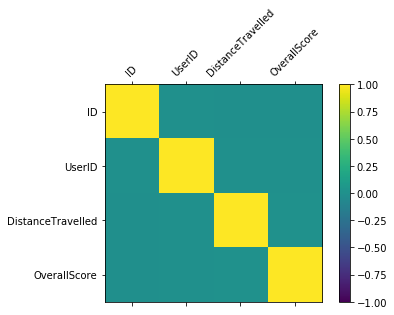

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45)
ax.set_yticklabels(names)
plt.show()

- It can be confirmed from the correlation plot that there is no correlation between Distance Travelled and Overall Score thus we cannot say if longer trips have lower scores

This is the plot from PowerBI and its showing the similar kind of trend but on microlevel

![AvgOfOverallScrByDistTravelled](img/2.jpg)

#### do drivers who have longer trips have worse scores?
Lets first filter out the users with longer trips

In [30]:
df[['UserID','DistanceTravelled','OverallScore']][df.DistanceTravelled>200].nlargest(100,'DistanceTravelled')

,UserID,DistanceTravelled,OverallScore
163,29,324.0,0.37
690,125,324.0,0.11
752,137,324.0,0.94
1832,338,324.0,0.03
1942,356,324.0,0.99
2050,375,324.0,0.08
2191,401,324.0,0.47
2520,461,324.0,0.87
3024,551,324.0,0.89
3708,673,324.0,0.30


In [31]:
df[['UserID','DistanceTravelled','OverallScore']][df.DistanceTravelled>200].count()

UserID               31279
DistanceTravelled    31279
OverallScore         31279
dtype: int64

Here we can see we have around 31000 users who have travelled more than 200 kms. Lets check out how many of them have overallScore <0.2. 
#### assumption: threshold to consider a score less than 0.2 as worst score

In [32]:
df[['UserID','DistanceTravelled','OverallScore']][df.DistanceTravelled>200].groupby('UserID')['OverallScore'].max()[:10]

UserID
1     0.64
2     0.73
3     0.88
4     0.93
5     0.29
6     0.13
8     0.75
9     0.83
11    0.76
12    1.00
Name: OverallScore, dtype: float64

In [33]:
np.count_nonzero(df[['UserID','DistanceTravelled','OverallScore']][df.DistanceTravelled>200].groupby('UserID')['OverallScore'].max()<0.2)

856

- As we can see out of about 31000 only 856 have score lower than 0.2, so we can't really say long distance drivers have worst scores. Since only 856 drivers have low score in this category, so there could be other factors which might have affected their overall score not only the distance. 

#### is quality of drivers improving over time?

In [34]:
df.groupby('UserID')


we can dive dataset dates into 4 quarters and take avg overall score in each quarter and compare if its increasing or not


In [35]:
print (df.RegisteredOn.min())
print (df.RegisteredOn.max())

2019-04-14 00:00:00
2020-02-01 00:00:00


As we can see here the data is provided from **14th April 2019 to 1st Feb 2020**, the idea is to see the average score of the users every quarter to find out whether its improving or not. 

In [36]:
df['quarters'] = df.RegisteredOn.dt.quarter

In [37]:
df.groupby('quarters')['OverallScore'].mean()

quarters
1    0.503960
2    0.506579
3    0.505167
4    0.505894
Name: OverallScore, dtype: float64

In [38]:
df[['OverallScore','quarters']][df.quarters==4].mean()

OverallScore    0.505894
quarters        4.000000
dtype: float64

In [39]:
order=[2,3,4,1]

In [40]:
#df.groupby('quarters')['OverallScore'].mean().plot.bar()

Text(0, 0.5, 'Overall Score')

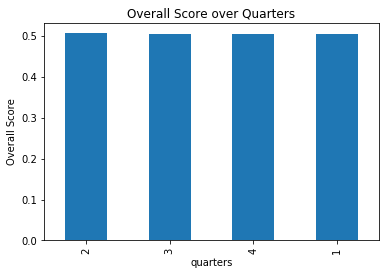

In [41]:
df.groupby('quarters')['OverallScore'].mean().loc[order].plot.bar()
plt.title("Overall Score over Quarters")
plt.ylabel("Overall Score")

#### We can see from the above plot that from 2019 2nd quarter onwards till 2020 1st quarter there hasnt been much change in the average overall score per quarter. This tell us the quality of drivers isnt getting better or decreasing with time. Its remaining almost constant.

### Bonus Question

![](img/bonus-1.jpg)

- To or from station id most traffic is in between these two station ids either it is a trend or data picked up from these 2 stations

![](img/bonus-2.jpg)

![](img/bonus-3.jpg)

![](img/bonus-4.jpg)

![](img/bonus-5.jpg)